In [14]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
from scipy import stats

In [15]:
N = 40
z_score_thresh = 3
data = np.random.randn(N)

data[data < -1] = data[data < -1] + 2
data[data > 2] = data[data > 2] ** 2
data = data * 200 + 50

#data_z = (data - data.mean()) / data.std(ddof=1)
data_z = stats.zscore(data)

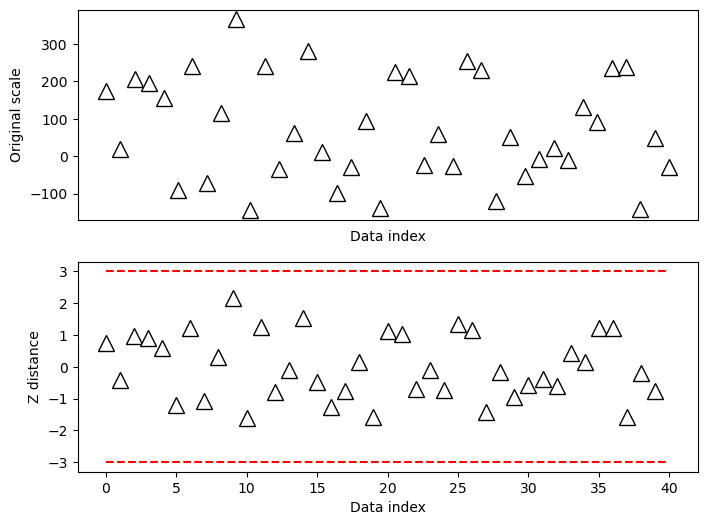

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Original scale')

ax[1].plot(data_z, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, len(data)], [z_score_thresh, z_score_thresh], 'r--')
ax[1].plot([0, len(data)], [-z_score_thresh, -z_score_thresh], 'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')

plt.show()

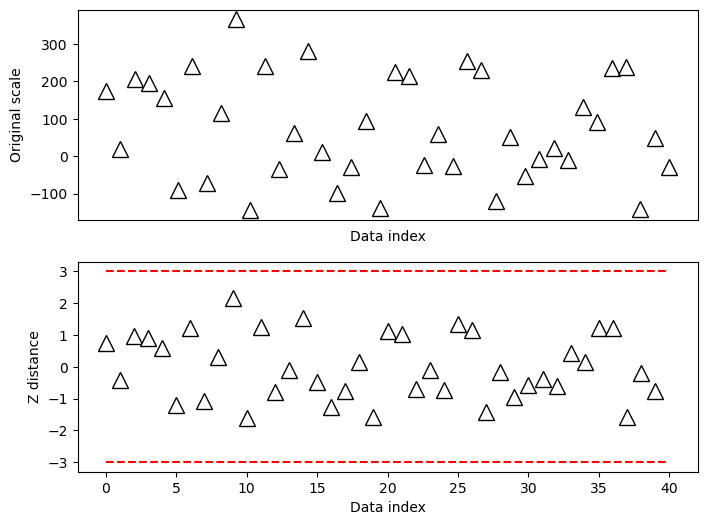

In [17]:
outliers = np.argwhere(np.abs(data_z) > z_score_thresh)

ax[0].plot(outliers, data[outliers], 'x', color='r', markersize=20)
ax[1].plot(outliers, data_z[outliers], 'x', color='r', markersize=20)

fig

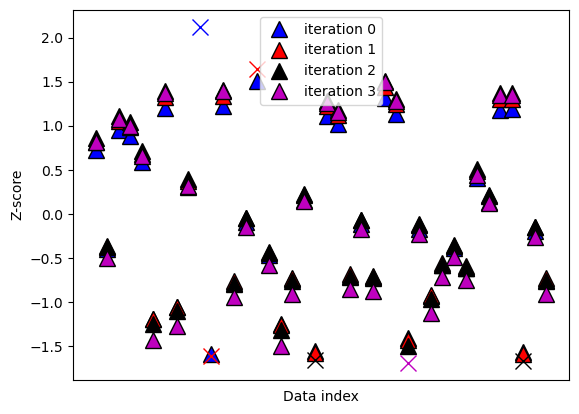

removed data points at index: [ 9 10 14 19 27 37]


In [28]:
z_score_thresh = 1.6
data_z = stats.zscore(data)

color_z = 'brkm'
num_iter = 0

while True:
    data_mean = np.nanmean(data_z)
    data_std = np.nanstd(data_z, ddof=1)
    data_z = (data_z - data_mean) / data_std
    
    outliers = np.abs(data_z) > z_score_thresh
    
    if np.sum(outliers) == 0:
        break
    else:
        plt.plot(np.argwhere(outliers), data_z[outliers], 'x', color=color_z[num_iter % len(color_z)], markersize=12)
        data_z[outliers] = np.nan
    
    plt.plot(data_z, 'k^', markersize=12, markerfacecolor=color_z[num_iter % len(color_z)], label=f'iteration {num_iter}')
    num_iter = num_iter + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()

plt.show()

print(f'removed data points at index: {np.where(np.isnan(data_z))[0]}')

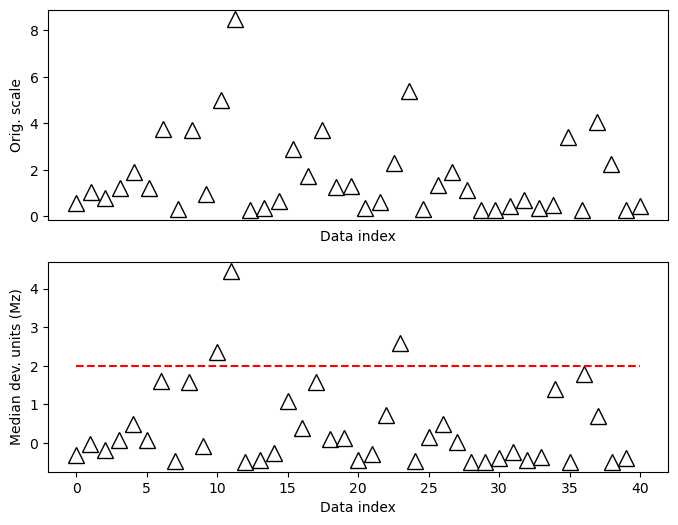

In [7]:
data = np.exp(np.random.randn(N))

data_med = np.median(data)
data_mad = robust.mad(data)

data_mz = stats.norm.ppf(0.75) * (data - data_med) / data_mad

fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

ax[1].plot(data_mz, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], np.repeat(z_score_thresh, 2), 'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')

plt.show()

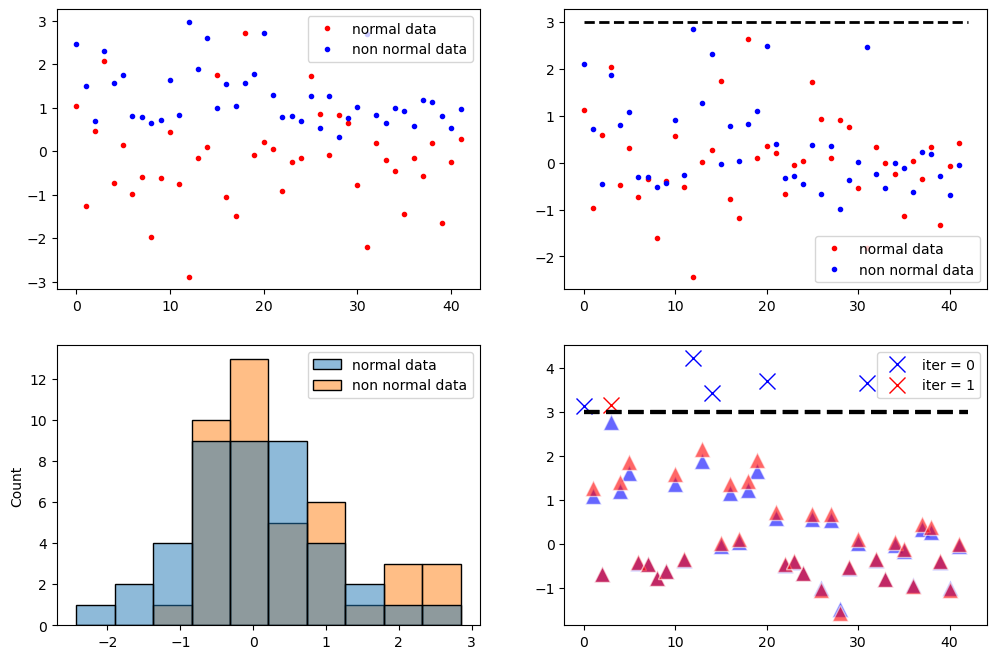

In [12]:
import seaborn as sns
import pandas as pd

N = 42
threshold = 3
iter_num = 0
colors = 'brkm'

data_norm = np.random.randn(N)
#data_non_norm = np.random.rand(N) * 0.4
data_non_norm = np.exp(np.random.randn(N) / 2)

data_z = stats.zscore(data_norm)
data_mz = stats.norm.ppf(0.75) * (data_non_norm - np.median(data_non_norm)) / robust.mad(data_non_norm)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(range(N), data_norm, 'r.', label='normal data')
ax[0, 0].plot(range(N), data_non_norm, 'b.', label='non normal data')
ax[0, 0].legend()

ax[0, 1].plot(range(N), data_z, 'r.', label='normal data')
ax[0, 1].plot(range(N), data_mz, 'b.', label='non normal data')
ax[0, 1].plot([0, N], np.tile(threshold, 2), 'k--', linewidth=2)
ax[0, 1].legend()

df_data = pd.DataFrame(np.c_[data_z, data_mz], columns=['normal data', 'non normal data'])
sns.histplot(df_data, ax=ax[1, 0])

while True:
    data_mz_median = np.nanmedian(data_mz)
    data_mz_mad = np.nanmedian(np.abs(data_mz - data_mz_median))
    
    data_mz = stats.norm.ppf(0.75) * (data_mz - data_mz_median) / data_mz_mad
    
    outliers = data_mz > threshold
    
    if np.sum(outliers) <= 0:
        break
        
    
    plt.plot(np.argwhere(outliers), data_mz[outliers], 'x', markersize=12, color=colors[iter_num % len(colors)], label=f'iter = {iter_num}')
    data_mz[outliers] = np.nan
    plt.plot(range(N), data_mz, '^', color=colors[iter_num % len(colors)], markersize=12, alpha=0.6, markeredgecolor='w')
    plt.plot([0, N], np.tile(threshold, 2), 'k--', linewidth=3)
    
    iter_num = iter_num + 1

plt.legend()
plt.show()